In [1]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score

In [2]:
# Load datasets
train_data = pd.read_csv(f'../dataset_classification/TrainDataset.csv')
test_data = pd.read_csv(f'../dataset_classification/TestDataset.csv')

#Clean TR from features
x_train = train_data.drop(columns = ["label", "position"])
y_train = train_data["label"]

#Split TR in TR and VL with HoldOut technique
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#Clean TS from features
x_test = test_data.drop(columns = ["label", "position"])
y_test = test_data["label"]

FileNotFoundError: [Errno 2] No such file or directory: '../DatasetClassification/TrainDataset.csv'

Starting training for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Finished training.

Final evaluation

Train accuracy: 0.9313097485096152
Validation accuracy: 0.9307550778099027
Test accuracy: 0.9186013590033975

Train Log-Loss: 0.20136748214668015
Val Log-Loss: 0.20071886222439103
Test Log-Loss: 0.2330516830724935

Train AUC: 0.9306435041925365
Val AUC: 0.9305410410723769
Test AUC: 0.8955799812055046

Starting SHAP analysis...


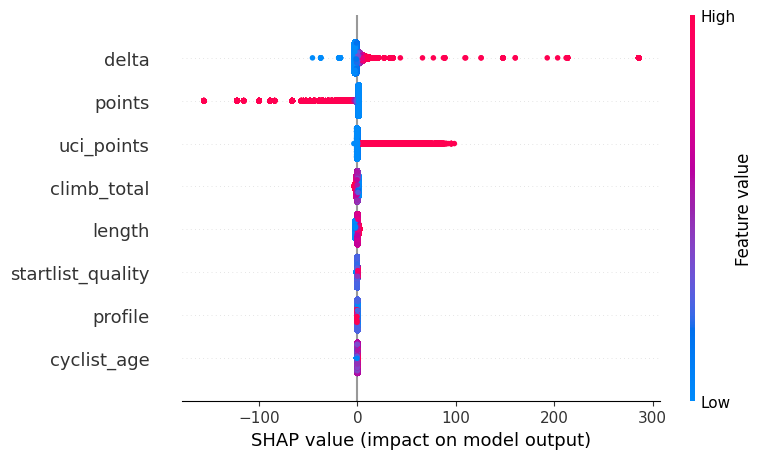

Finished SHAP analysis.


In [48]:
# Define model
clf = LogisticRegression(verbose=1, max_iter=500, random_state=42)

# Train model
print("Starting training for StackingClassifier with linear models...")
clf.fit(x_train, y_train)
print("Finished training.")

# Evaluate model
print("")
print("Final evaluation")
print("")

train_accuracy = accuracy_score(y_train, clf.predict(x_train))
val_accuracy = accuracy_score(y_val, clf.predict(x_val))
test_accuracy = accuracy_score(y_test, clf.predict(x_test))

print(f"Train accuracy: {train_accuracy}")
print(f"Validation accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy}")
print("")

# Calculate log-loss
train_y_proba = clf.predict_proba(x_train)
val_y_proba = clf.predict_proba(x_val)
test_y_proba = clf.predict_proba(x_test)

train_loss = log_loss(y_train, train_y_proba)
val_loss = log_loss(y_val, val_y_proba)
test_loss = log_loss(y_test, test_y_proba)

print(f"Train Log-Loss: {train_loss}")
print(f"Val Log-Loss: {val_loss}")
print(f"Test Log-Loss: {test_loss}")
print("")

# Calculate AUC
train_auc = roc_auc_score(y_train, train_y_proba[:, 1])
val_auc = roc_auc_score(y_val, val_y_proba[:, 1])
test_auc = roc_auc_score(y_test, test_y_proba[:, 1])

print(f"Train AUC: {train_auc}")
print(f"Val AUC: {val_auc}")
print(f"Test AUC: {test_auc}")
print("")

# SHAP Integration -------------------------------------------------------------------
print("Starting SHAP analysis...")

# Apply SHAP to model
explainer = shap.Explainer(clf, x_train)
shap_values = explainer(x_train)

# Visualize SHAP analysis to model
shap.summary_plot(shap_values, x_train)

print("Finished SHAP analysis.")